Importación de librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math  
from sklearn import metrics
from time import time 
np.random.seed(42)

Creación del Dataset de pruebas

In [2]:
#Dimension de los datos a generar
#rango de los datos(- 10.0, 10.0))
dimensiones = 12
from sklearn.datasets import make_blobs
#creacion de dataset original 
n_muestras = 800
Dataset, etiquetas_reales = make_blobs(n_samples=n_muestras, n_features=dimensiones)

In [3]:
Dataset

array([[ -1.97090154,  10.08679347,   4.27492611, ...,   3.88463826,
         -9.28090342,  10.21393426],
       [ -2.58629933,   9.3554381 ,   4.91656964, ...,   3.304294  ,
        -10.65920261,   9.88066946],
       [ -4.46029949,   9.15787406,   2.82189961, ...,   4.74499586,
         -9.71782736,   9.97805433],
       ...,
       [ -2.03059786,   5.8126022 ,  -5.62055426, ...,   8.41265027,
         11.18371514,   5.31706287],
       [ -1.21438625,   4.54888489,  -7.07220705, ...,   8.57361543,
         11.34817212,   8.16004137],
       [  5.21802161,  -6.22977159,  -6.66232074, ...,  -5.62800604,
         -4.55657252,  -2.54357566]])

Normalizacion con valores entre 0 y 1

In [4]:
maximo , minimo = Dataset.max(), Dataset.min()
X = (Dataset - minimo) / (maximo - minimo)

Metodo del codo

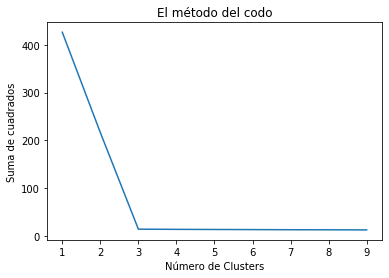

In [5]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42, max_iter=1)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Grafica de la suma de las distancias
plt.plot(range(1, 10), wcss)
plt.title('El método del codo')
plt.xlabel('Número de Clusters')
plt.ylabel('Suma de cuadrados')
plt.show()

Parámetros del K-means y kmedoides

In [6]:
param_kmeans_nro1=2
param_kmeans_nro2=3
param_kmeans_nro3=4
param_kmedoids_nro1=2
param_kmedoids_nro2=3
param_kmedoids_nro3=4

0.1539461423937262


<Figure size 360x360 with 0 Axes>

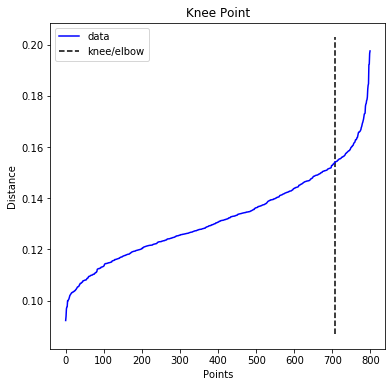

In [7]:
from sklearn.neighbors import NearestNeighbors
nearest_neighbors = NearestNeighbors(n_neighbors=15)
neighbors = nearest_neighbors.fit(X)
distances, indices = neighbors.kneighbors(X)
distances = np.sort(distances, axis=0)
distances1 = distances[:,14]
from kneed import KneeLocator
i = np.arange(len(distances))
knee = KneeLocator(i, distances1, S=1, curve='convex', direction='increasing', interp_method='polynomial')
fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print(distances1[knee.knee])

0.16302774962417618


<Figure size 360x360 with 0 Axes>

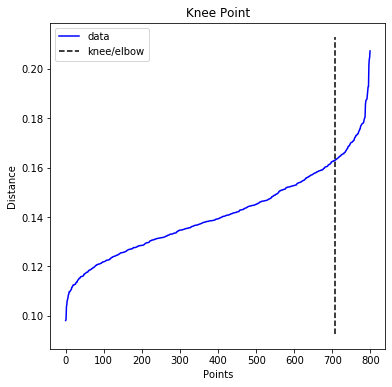

In [8]:
from sklearn.neighbors import NearestNeighbors
nearest_neighbors = NearestNeighbors(n_neighbors=25)
neighbors = nearest_neighbors.fit(X)
distances, indices = neighbors.kneighbors(X)
distances = np.sort(distances, axis=0)
distances2 = distances[:,24]
from kneed import KneeLocator
i = np.arange(len(distances))
knee = KneeLocator(i, distances2, S=1, curve='convex', direction='increasing', interp_method='polynomial')
fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print(distances2[knee.knee])

0.16979495280711646


<Figure size 360x360 with 0 Axes>

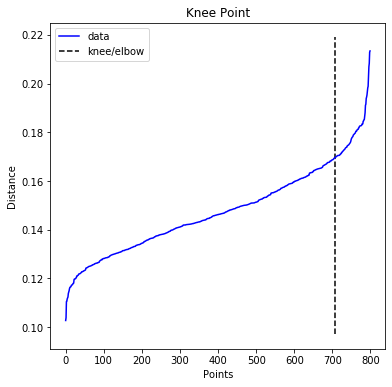

In [9]:
from sklearn.neighbors import NearestNeighbors
nearest_neighbors = NearestNeighbors(n_neighbors=35)
neighbors = nearest_neighbors.fit(X)
distances, indices = neighbors.kneighbors(X)
distances = np.sort(distances, axis=0)
distances3 = distances[:,34]
from kneed import KneeLocator
i = np.arange(len(distances))
knee = KneeLocator(i, distances3, S=1, curve='convex', direction='increasing', interp_method='polynomial')
fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print(distances3[knee.knee])

Parámetros del DBSCAN y HDBSCAN

In [10]:
param_minpts_nro1=15
param_minpts_nro2=25
param_minpts_nro3=35
param_eps_nro1= float(format(distances1[knee.knee], '.5')) #Para que tome los primeros 4 digitos despues del punto
param_eps_nro2= float(format(distances2[knee.knee], '.5'))
param_eps_nro3= float(format(distances3[knee.knee], '.5'))

Declaración de variables para guardar los resultados

In [11]:
#INDICE DE RAN AJUSTADO 
#Para los resultados del algoritmo k-means evaluados por la metrica Indice de Rand Ajustado
RandkmeansclusteringK1 = pd.DataFrame(columns=['Evaluacion','Iteracion','PorcRuido','Resultado'])
RandkmeansclusteringK2 = pd.DataFrame(columns=['Evaluacion','Iteracion','PorcRuido','Resultado'])
RandkmeansclusteringK3 = pd.DataFrame(columns=['Evaluacion','Iteracion','PorcRuido','Resultado'])
#Para los resultados del algoritmo Kmedoides evaluados por la metrica Indice de Rand Ajustado
RandkmedoidclusteringK1 = pd.DataFrame(columns=['Evaluacion','Iteracion','PorcRuido','Resultado']) 
RandkmedoidclusteringK2 = pd.DataFrame(columns=['Evaluacion','Iteracion','PorcRuido','Resultado']) 
RandkmedoidclusteringK3 = pd.DataFrame(columns=['Evaluacion','Iteracion','PorcRuido','Resultado']) 
#Para los resultados del algoritmo DBSCAN evaluados por la metrica Indice de Rand Ajustado
RandDbscanclustering1 = pd.DataFrame(columns=['Evaluacion','Iteracion','PorcRuido','Resultado']) 
RandDbscanclustering2 = pd.DataFrame(columns=['Evaluacion','Iteracion','PorcRuido','Resultado']) 
RandDbscanclustering3 = pd.DataFrame(columns=['Evaluacion','Iteracion','PorcRuido','Resultado']) 

#Información mutua ajustada 
#Para los resultados del algoritmo k-means evaluados por la metrica de Información mutua ajustada
IMkmeansclusteringK1 = pd.DataFrame(columns=['Evaluacion','Iteracion','PorcRuido','Resultado'])
IMkmeansclusteringK2 = pd.DataFrame(columns=['Evaluacion','Iteracion','PorcRuido','Resultado'])
IMkmeansclusteringK3 = pd.DataFrame(columns=['Evaluacion','Iteracion','PorcRuido','Resultado'])
#Para los resultados del algoritmo Kmedoides evaluados por la metrica de Información mutua ajustada
IMkmedoidclusteringK1 = pd.DataFrame(columns=['Evaluacion','Iteracion','PorcRuido','Resultado']) 
IMkmedoidclusteringK2 = pd.DataFrame(columns=['Evaluacion','Iteracion','PorcRuido','Resultado']) 
IMkmedoidclusteringK3 = pd.DataFrame(columns=['Evaluacion','Iteracion','PorcRuido','Resultado']) 
#Para los resultados del algoritmo DBSCAN evaluados por la metrica deInformación mutua ajustada
IMDbscanclustering1 = pd.DataFrame(columns=['Evaluacion','Iteracion','PorcRuido','Resultado']) 
IMDbscanclustering2 = pd.DataFrame(columns=['Evaluacion','Iteracion','PorcRuido','Resultado']) 
IMDbscanclustering3 = pd.DataFrame(columns=['Evaluacion','Iteracion','PorcRuido','Resultado']) 

#Puntuaciones de Fowlkes-Mallows
#Para los resultados del algoritmo k-means evaluados por la metrica de Fowlkes-Mallows
FMkmeansclusteringK1 = pd.DataFrame(columns=['Evaluacion','Iteracion','PorcRuido','Resultado'])
FMkmeansclusteringK2 = pd.DataFrame(columns=['Evaluacion','Iteracion','PorcRuido','Resultado'])
FMkmeansclusteringK3 = pd.DataFrame(columns=['Evaluacion','Iteracion','PorcRuido','Resultado'])
#Para los resultados del algoritmo Kmedoides evaluados por la metrica de Fowlkes-Mallows
FMkmedoidclusteringK1 = pd.DataFrame(columns=['Evaluacion','Iteracion','PorcRuido','Resultado']) 
FMkmedoidclusteringK2 = pd.DataFrame(columns=['Evaluacion','Iteracion','PorcRuido','Resultado']) 
FMkmedoidclusteringK3 = pd.DataFrame(columns=['Evaluacion','Iteracion','PorcRuido','Resultado']) 
#Para los resultados del algoritmo DBSCAN evaluados por la metrica de Fowlkes-Mallows
FMDbscanclustering1 = pd.DataFrame(columns=['Evaluacion','Iteracion','PorcRuido','Resultado']) 
FMDbscanclustering2 = pd.DataFrame(columns=['Evaluacion','Iteracion','PorcRuido','Resultado']) 
FMDbscanclustering3 = pd.DataFrame(columns=['Evaluacion','Iteracion','PorcRuido','Resultado']) 

In [12]:
'''Esta seccion del codigo es para suprimir las advertencias futuras, es de unas actualizaciones que tendra la libreria, 
para evitar confuciones en la ejecucion'''
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

Evaluación de Datos

In [13]:
evaluacion = 1 
nf=1
while evaluacion < 26:  
    #Aplicación del algoritmo K-means con tres parametros diferentes
    from sklearn.cluster import KMeans
    KmeansSinRuido = KMeans(n_clusters=param_kmeans_nro1) #1era aplicacion
    etiquetas_KmeansSinRuidoK1 = KmeansSinRuido.fit(X).labels_  
    KmeansSinRuido = KMeans(n_clusters=param_kmeans_nro2) #2da aplicacion
    etiquetas_KmeansSinRuidoK2 = KmeansSinRuido.fit(X).labels_  
    KmeansSinRuido = KMeans(n_clusters=param_kmeans_nro3) #3ra aplicacion
    etiquetas_KmeansSinRuidoK3 = KmeansSinRuido.fit(X).labels_  
    #Aplicación del algoritmo K-medoids
    from sklearn_extra.cluster import KMedoids    
    etiquetas_KmedoidSinRuidoK = KMedoids(n_clusters=param_kmedoids_nro1).fit(X) #1era aplicacion
    etiquetas_KmedoidSinRuidoK1 = etiquetas_KmedoidSinRuidoK.labels_
    etiquetas_KmedoidSinRuidoK = KMedoids(n_clusters=param_kmedoids_nro2).fit(X) #2da aplicacion
    etiquetas_KmedoidSinRuidoK2 = etiquetas_KmedoidSinRuidoK.labels_
    etiquetas_KmedoidSinRuidoK = KMedoids(n_clusters=param_kmedoids_nro3).fit(X) #3ra aplicacion
    etiquetas_KmedoidSinRuidoK3 = etiquetas_KmedoidSinRuidoK.labels_ 
    #Aplicacion del algoritmo DBSCAN
    from sklearn.cluster import DBSCAN
    dbscanSinRuido1 = DBSCAN(eps=param_eps_nro1, min_samples=param_minpts_nro1) #1era aplicacion
    etiquetas_dbscanSinRuido1 = dbscanSinRuido1.fit(X).labels_
    dbscanSinRuido2 = DBSCAN(eps=param_eps_nro2, min_samples=param_minpts_nro2) #2da aplicacion
    etiquetas_dbscanSinRuido2 = dbscanSinRuido2.fit(X).labels_
    dbscanSinRuido3 = DBSCAN(eps=param_eps_nro3, min_samples=param_minpts_nro3) #3ra aplicacion
    etiquetas_dbscanSinRuido3 = dbscanSinRuido3.fit(X).labels_
    print("*****Inicio de la Evaluacion numero : " + str(evaluacion) +"*****")
    print("+++++++++++++++++++")
    #Contenido Principal
    #Evaluacion con Resultado
    Iteracion=1
    while Iteracion < 11:
        print("*****Inicio de la Iteración numero : " + str(Iteracion) +" *****")
        porcRuido=10
        NroMuestraConRuido=n_muestras + int((n_muestras*porcRuido)/100)
        cant_aleatoria=int((n_muestras*porcRuido)/100)
        while porcRuido < 110:
            #Generacion de puntos de ruido de forma aleatoria
            ruido=np.random.rand(cant_aleatoria,dimensiones) 
            # formula= Final - inicio * np.random.random(filas,columnas) + inicio (-10,10) 
            #ruido= 20 * np.random.random((cant_aleatoria,dimensiones)) - 10
            #Se agrega los puntos del ruido al X original
            XRuido=np.concatenate((X,ruido), axis=0)         
            #Aplicacion de algoritmos  variados con sus parametros al conjunto ruidoso      
            #K-means
            estimador_kmediasR = KMeans(n_clusters=param_kmeans_nro1)
            KmeansRuidoK1 = estimador_kmediasR.fit(XRuido).labels_
            estimador_kmediasR = KMeans(n_clusters=param_kmeans_nro2)
            KmeansRuidoK2 = estimador_kmediasR.fit(XRuido).labels_
            estimador_kmediasR = KMeans(n_clusters=param_kmeans_nro3)
            KmeansRuidoK3 = estimador_kmediasR.fit(XRuido).labels_
            #Kmedoides
            KmedoidsRuidoK= KMedoids(n_clusters=param_kmedoids_nro1, random_state=0).fit(XRuido)
            KmedoidsRuidoK1=KmedoidsRuidoK.labels_
            KmedoidsRuidoK= KMedoids(n_clusters=param_kmedoids_nro2, random_state=0).fit(XRuido)
            KmedoidsRuidoK2=KmedoidsRuidoK.labels_
            KmedoidsRuidoK= KMedoids(n_clusters=param_kmedoids_nro3, random_state=0).fit(XRuido)
            KmedoidsRuidoK3=KmedoidsRuidoK.labels_
            #DBSCAN
            estimador_DbscanR = DBSCAN(eps=param_eps_nro1, min_samples=param_minpts_nro1)
            DbscanRuido1 = estimador_DbscanR.fit(XRuido).labels_
            estimador_DbscanR = DBSCAN(eps=param_eps_nro2, min_samples=param_minpts_nro2)
            DbscanRuido2 = estimador_DbscanR.fit(XRuido).labels_
            estimador_DbscanR = DBSCAN(eps=param_eps_nro3, min_samples=param_minpts_nro3)
            DbscanRuido3 = estimador_DbscanR.fit(XRuido).labels_
            #Luego aplicar al conjunto ruidoso, aqui le quito los datos generados aleatoriamente
            KmeansRuidosoK1=KmeansRuidoK1[:n_muestras]
            KmeansRuidosoK2=KmeansRuidoK2[:n_muestras]
            KmeansRuidosoK3=KmeansRuidoK3[:n_muestras]
            KmedoidRuidosoK1=KmedoidsRuidoK1[:n_muestras]
            KmedoidRuidosoK2=KmedoidsRuidoK2[:n_muestras]
            KmedoidRuidosoK3=KmedoidsRuidoK3[:n_muestras]
            DbscanRuidoso1=DbscanRuido1[:n_muestras]
            DbscanRuidoso2=DbscanRuido2[:n_muestras]
            DbscanRuidoso3=DbscanRuido3[:n_muestras]
            #evaluaciond de los algoritmos utilizando las metricas 
            #Evaluacion Indice de Rand Ajustado
            RANDKmeansK1=metrics.adjusted_rand_score(etiquetas_KmeansSinRuidoK1, KmeansRuidosoK1)
            RANDKmeansK2=metrics.adjusted_rand_score(etiquetas_KmeansSinRuidoK2, KmeansRuidosoK2)
            RANDKmeansK3=metrics.adjusted_rand_score(etiquetas_KmeansSinRuidoK3, KmeansRuidosoK3)
            RANDKmedoidK1=metrics.adjusted_rand_score(etiquetas_KmedoidSinRuidoK1,KmedoidRuidosoK1) 
            RANDKmedoidK2=metrics.adjusted_rand_score(etiquetas_KmedoidSinRuidoK2,KmedoidRuidosoK2) 
            RANDKmedoidK3=metrics.adjusted_rand_score(etiquetas_KmedoidSinRuidoK3,KmedoidRuidosoK3) 
            RANDDbscan1=metrics.adjusted_rand_score(etiquetas_dbscanSinRuido1,DbscanRuidoso1) 
            RANDDbscan2=metrics.adjusted_rand_score(etiquetas_dbscanSinRuido2,DbscanRuidoso2) 
            RANDDbscan3=metrics.adjusted_rand_score(etiquetas_dbscanSinRuido3,DbscanRuidoso3) 
            #Evaluacion  de Fowlkes-Mallows
            FMKmeansK1=metrics.fowlkes_mallows_score(etiquetas_KmeansSinRuidoK1, KmeansRuidosoK1)
            FMKmeansK2=metrics.fowlkes_mallows_score(etiquetas_KmeansSinRuidoK2, KmeansRuidosoK2)
            FMKmeansK3=metrics.fowlkes_mallows_score(etiquetas_KmeansSinRuidoK3, KmeansRuidosoK3)
            FMKmedoidK1=metrics.fowlkes_mallows_score(etiquetas_KmedoidSinRuidoK1,KmedoidRuidosoK1)
            FMKmedoidK2=metrics.fowlkes_mallows_score(etiquetas_KmedoidSinRuidoK2,KmedoidRuidosoK2)
            FMKmedoidK3=metrics.fowlkes_mallows_score(etiquetas_KmedoidSinRuidoK3,KmedoidRuidosoK3)
            FMDbscan1=metrics.fowlkes_mallows_score(etiquetas_dbscanSinRuido1,DbscanRuidoso1)
            FMDbscan2=metrics.fowlkes_mallows_score(etiquetas_dbscanSinRuido2,DbscanRuidoso2)
            FMDbscan3=metrics.fowlkes_mallows_score(etiquetas_dbscanSinRuido3,DbscanRuidoso3)
            #Información mutua ajustada 
            IMKmeansK1=metrics.adjusted_mutual_info_score(etiquetas_KmeansSinRuidoK1, KmeansRuidosoK1)
            IMKmeansK2=metrics.adjusted_mutual_info_score(etiquetas_KmeansSinRuidoK2, KmeansRuidosoK2)
            IMKmeansK3=metrics.adjusted_mutual_info_score(etiquetas_KmeansSinRuidoK3, KmeansRuidosoK3)
            IMKmedoidK1=metrics.adjusted_mutual_info_score(etiquetas_KmedoidSinRuidoK1, KmedoidRuidosoK1) 
            IMKmedoidK2=metrics.adjusted_mutual_info_score(etiquetas_KmedoidSinRuidoK2, KmedoidRuidosoK2) 
            IMKmedoidK3=metrics.adjusted_mutual_info_score(etiquetas_KmedoidSinRuidoK3, KmedoidRuidosoK3) 
            IMDbscan1=metrics.adjusted_mutual_info_score(etiquetas_dbscanSinRuido1, DbscanRuidoso1) 
            IMDbscan2=metrics.adjusted_mutual_info_score(etiquetas_dbscanSinRuido2, DbscanRuidoso2) 
            IMDbscan3=metrics.adjusted_mutual_info_score(etiquetas_dbscanSinRuido3, DbscanRuidoso3) 
            #Se agregan los valores 
            #Indice de RAND
            RandkmeansclusteringK1.loc[nf]=int(evaluacion),int(Iteracion),int(porcRuido/2),RANDKmeansK1
            RandkmeansclusteringK2.loc[nf]=int(evaluacion),int(Iteracion),int(porcRuido/2),RANDKmeansK2
            RandkmeansclusteringK3.loc[nf]=int(evaluacion),int(Iteracion),int(porcRuido/2),RANDKmeansK3
            RandkmedoidclusteringK1.loc[nf]=int(evaluacion),int(Iteracion),int(porcRuido/2),RANDKmeansK1
            RandkmedoidclusteringK2.loc[nf]=int(evaluacion),int(Iteracion),int(porcRuido/2),RANDKmeansK2
            RandkmedoidclusteringK3.loc[nf]=int(evaluacion),int(Iteracion),int(porcRuido/2),RANDKmeansK3
            RandDbscanclustering1.loc[nf]=int(evaluacion),int(Iteracion),int(porcRuido/2),RANDDbscan1
            RandDbscanclustering2.loc[nf]=int(evaluacion),int(Iteracion),int(porcRuido/2),RANDDbscan2
            RandDbscanclustering3.loc[nf]=int(evaluacion),int(Iteracion),int(porcRuido/2),RANDDbscan3
            #Información mutua ajustada 
            IMkmeansclusteringK1.loc[nf]=int(evaluacion),int(Iteracion),int(porcRuido/2),IMKmeansK1
            IMkmeansclusteringK2.loc[nf]=int(evaluacion),int(Iteracion),int(porcRuido/2),IMKmeansK2
            IMkmeansclusteringK3.loc[nf]=int(evaluacion),int(Iteracion),int(porcRuido/2),IMKmeansK3
            IMkmedoidclusteringK1.loc[nf]=int(evaluacion),int(Iteracion),int(porcRuido/2),IMKmedoidK1
            IMkmedoidclusteringK2.loc[nf]=int(evaluacion),int(Iteracion),int(porcRuido/2),IMKmedoidK2
            IMkmedoidclusteringK3.loc[nf]=int(evaluacion),int(Iteracion),int(porcRuido/2),IMKmedoidK3
            IMDbscanclustering1.loc[nf]=int(evaluacion),int(Iteracion),int(porcRuido/2),IMDbscan1
            IMDbscanclustering2.loc[nf]=int(evaluacion),int(Iteracion),int(porcRuido/2),IMDbscan2
            IMDbscanclustering3.loc[nf]=int(evaluacion),int(Iteracion),int(porcRuido/2),IMDbscan3
            #Puntuaciones de Fowlkes-Mallows
            FMkmeansclusteringK1.loc[nf]=int(evaluacion),int(Iteracion),int(porcRuido/2),FMKmeansK1
            FMkmeansclusteringK2.loc[nf]=int(evaluacion),int(Iteracion),int(porcRuido/2),FMKmeansK2
            FMkmeansclusteringK3.loc[nf]=int(evaluacion),int(Iteracion),int(porcRuido/2),FMKmeansK3
            FMkmedoidclusteringK1.loc[nf]=int(evaluacion),int(Iteracion),int(porcRuido/2),FMKmedoidK1
            FMkmedoidclusteringK2.loc[nf]=int(evaluacion),int(Iteracion),int(porcRuido/2),FMKmedoidK2
            FMkmedoidclusteringK3.loc[nf]=int(evaluacion),int(Iteracion),int(porcRuido/2),FMKmedoidK3
            FMDbscanclustering1.loc[nf]=int(evaluacion),int(Iteracion),int(porcRuido/2),FMDbscan1
            FMDbscanclustering2.loc[nf]=int(evaluacion),int(Iteracion),int(porcRuido/2),FMDbscan2
            FMDbscanclustering3.loc[nf]=int(evaluacion),int(Iteracion),int(porcRuido/2),FMDbscan3
            #Reinicio de variables
            porcRuido = porcRuido + 10
            NroMuestraConRuido=n_muestras + int((n_muestras*porcRuido)/100)
            cant_aleatoria=int((n_muestras*porcRuido)/100)
            nf=nf+1 
        print("*****Fin de la Iteración numero : " + str(Iteracion) +"****")
        Iteracion=Iteracion+1
    print("***** Fin de la Evaluacion numero : " + str(evaluacion) +" *****")
    print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    evaluacion=evaluacion+1

*****Inicio de la Evaluacion numero : 1*****
+++++++++++++++++++
*****Inicio de la Iteración numero : 1 *****
*****Fin de la Iteración numero : 1****
*****Inicio de la Iteración numero : 2 *****
*****Fin de la Iteración numero : 2****
*****Inicio de la Iteración numero : 3 *****
*****Fin de la Iteración numero : 3****
*****Inicio de la Iteración numero : 4 *****
*****Fin de la Iteración numero : 4****
*****Inicio de la Iteración numero : 5 *****
*****Fin de la Iteración numero : 5****
*****Inicio de la Iteración numero : 6 *****
*****Fin de la Iteración numero : 6****
*****Inicio de la Iteración numero : 7 *****
*****Fin de la Iteración numero : 7****
*****Inicio de la Iteración numero : 8 *****
*****Fin de la Iteración numero : 8****
*****Inicio de la Iteración numero : 9 *****
*****Fin de la Iteración numero : 9****
*****Inicio de la Iteración numero : 10 *****
*****Fin de la Iteración numero : 10****
***** Fin de la Evaluacion numero : 1 *****
+++++++++++++++++++++++++++++++++++++++

*****Fin de la Iteración numero : 8****
*****Inicio de la Iteración numero : 9 *****
*****Fin de la Iteración numero : 9****
*****Inicio de la Iteración numero : 10 *****
*****Fin de la Iteración numero : 10****
***** Fin de la Evaluacion numero : 8 *****
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
*****Inicio de la Evaluacion numero : 9*****
+++++++++++++++++++
*****Inicio de la Iteración numero : 1 *****
*****Fin de la Iteración numero : 1****
*****Inicio de la Iteración numero : 2 *****
*****Fin de la Iteración numero : 2****
*****Inicio de la Iteración numero : 3 *****
*****Fin de la Iteración numero : 3****
*****Inicio de la Iteración numero : 4 *****
*****Fin de la Iteración numero : 4****
*****Inicio de la Iteración numero : 5 *****
*****Fin de la Iteración numero : 5****
*****Inicio de la Iteración numero : 6 *****
*****Fin de la Iteración numero : 6****
*****Inicio de la Iteración numero : 7 *****
*****Fin 

*****Fin de la Iteración numero : 3****
*****Inicio de la Iteración numero : 4 *****
*****Fin de la Iteración numero : 4****
*****Inicio de la Iteración numero : 5 *****
*****Fin de la Iteración numero : 5****
*****Inicio de la Iteración numero : 6 *****
*****Fin de la Iteración numero : 6****
*****Inicio de la Iteración numero : 7 *****
*****Fin de la Iteración numero : 7****
*****Inicio de la Iteración numero : 8 *****
*****Fin de la Iteración numero : 8****
*****Inicio de la Iteración numero : 9 *****
*****Fin de la Iteración numero : 9****
*****Inicio de la Iteración numero : 10 *****
*****Fin de la Iteración numero : 10****
***** Fin de la Evaluacion numero : 16 *****
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
*****Inicio de la Evaluacion numero : 17*****
+++++++++++++++++++
*****Inicio de la Iteración numero : 1 *****
*****Fin de la Iteración numero : 1****
*****Inicio de la Iteración numero : 2 *****
*****Fi

*****Fin de la Iteración numero : 1****
*****Inicio de la Iteración numero : 2 *****
*****Fin de la Iteración numero : 2****
*****Inicio de la Iteración numero : 3 *****
*****Fin de la Iteración numero : 3****
*****Inicio de la Iteración numero : 4 *****
*****Fin de la Iteración numero : 4****
*****Inicio de la Iteración numero : 5 *****
*****Fin de la Iteración numero : 5****
*****Inicio de la Iteración numero : 6 *****
*****Fin de la Iteración numero : 6****
*****Inicio de la Iteración numero : 7 *****
*****Fin de la Iteración numero : 7****
*****Inicio de la Iteración numero : 8 *****
*****Fin de la Iteración numero : 8****
*****Inicio de la Iteración numero : 9 *****
*****Fin de la Iteración numero : 9****
*****Inicio de la Iteración numero : 10 *****
*****Fin de la Iteración numero : 10****
***** Fin de la Evaluacion numero : 24 *****
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
*****Inicio de la Evaluacion nume

# Resultados Agrupados por Algoritmos

Se promedia 250 resultados de las metricas aplicadas agrupadas por el porcentaje de ruido

K-means

#En caso de querer guardar los resutaldos obtendidos en una planilla excel
#Exportacion de de los resultados
resultado = "ResultadosPruebas.xlsx"
writer = pd.ExcelWriter(resultado,engine="xlsxwriter")

kmeansclusteringK.to_excel(writer,sheet_name="Kmeans", index = False) #sheet_name es el nombre de la hoja

#Guardar archivo para finalizar
writer.save()
writer.close()

Índice de Rand ajustado

In [14]:
mediasRandkmeansK1 = RandkmeansclusteringK1.groupby([RandkmeansclusteringK1['PorcRuido']
                              ])['Resultado'].mean()

mediasRandkmeansK1.index.names = ["PorcRuido"]
mediasRandkmeansK1

PorcRuido
5.0     0.996401
10.0    0.985605
15.0    0.946020
20.0    0.870449
25.0    0.834462
30.0    0.697714
35.0    0.629339
40.0    0.481795
45.0    0.409822
50.0    0.255080
Name: Resultado, dtype: float64

In [15]:
mediasRandkmeansK2 = RandkmeansclusteringK2.groupby([RandkmeansclusteringK2['PorcRuido']
                              ])['Resultado'].mean()

mediasRandkmeansK2.index.names = ["PorcRuido"]
mediasRandkmeansK2

PorcRuido
5.0     1.0
10.0    1.0
15.0    1.0
20.0    1.0
25.0    1.0
30.0    1.0
35.0    1.0
40.0    1.0
45.0    1.0
50.0    1.0
Name: Resultado, dtype: float64

In [16]:
mediasRandkmeansK3 = RandkmeansclusteringK3.groupby([RandkmeansclusteringK3['PorcRuido']
                              ])['Resultado'].mean()

mediasRandkmeansK3.index.names = ["PorcRuido"]
mediasRandkmeansK3

PorcRuido
5.0     0.871071
10.0    0.871071
15.0    0.871071
20.0    0.871071
25.0    0.871071
30.0    0.871071
35.0    0.871071
40.0    0.871071
45.0    0.871071
50.0    0.871071
Name: Resultado, dtype: float64

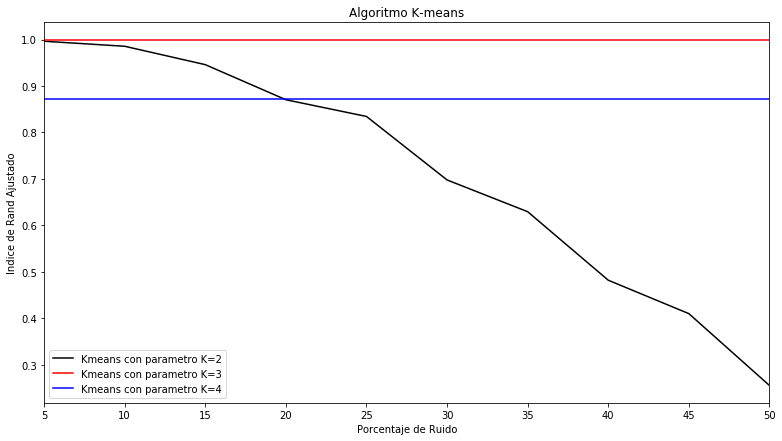

In [17]:
#K-means Indice de Rand Ajustado
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(13, 7))
mediasRandkmeansK1.plot(color='black',label="Kmeans con parametro K=" + str(param_kmeans_nro1))
mediasRandkmeansK2.plot(color='red',label="Kmeans con parametro K=" + str(param_kmeans_nro2))
mediasRandkmeansK3.plot(color='blue',label="Kmeans con parametro K=" +  str(param_kmeans_nro3))
plt.xlabel('Porcentaje de Ruido')
plt.ylabel('Indice de Rand Ajustado')
plt.title('Algoritmo K-means')
plt.legend()
plt.show()

Informacion Mutua Ajustada

In [18]:
mediasIMkmeansK1 = IMkmeansclusteringK1.groupby([IMkmeansclusteringK1['PorcRuido']
                              ])['Resultado'].mean()

mediasIMkmeansK1.index.names = ["PorcRuido"]
mediasIMkmeansK1

PorcRuido
5.0     0.997096
10.0    0.988385
15.0    0.956445
20.0    0.895469
25.0    0.866432
30.0    0.756093
35.0    0.700924
40.0    0.581874
45.0    0.523801
50.0    0.398944
Name: Resultado, dtype: float64

In [19]:
mediasIMkmeansK2 = IMkmeansclusteringK2.groupby([IMkmeansclusteringK2['PorcRuido']
                              ])['Resultado'].mean()

mediasIMkmeansK2.index.names = ["PorcRuido"]
mediasIMkmeansK2

PorcRuido
5.0     1.0
10.0    1.0
15.0    1.0
20.0    1.0
25.0    1.0
30.0    1.0
35.0    1.0
40.0    1.0
45.0    1.0
50.0    1.0
Name: Resultado, dtype: float64

In [20]:
mediasIMkmeansK3 = IMkmeansclusteringK3.groupby([IMkmeansclusteringK3['PorcRuido']
                              ])['Resultado'].mean()

mediasIMkmeansK3.index.names = ["PorcRuido"]
mediasIMkmeansK3

PorcRuido
5.0     0.827026
10.0    0.827026
15.0    0.827026
20.0    0.827026
25.0    0.827026
30.0    0.827026
35.0    0.827026
40.0    0.827026
45.0    0.827026
50.0    0.827026
Name: Resultado, dtype: float64

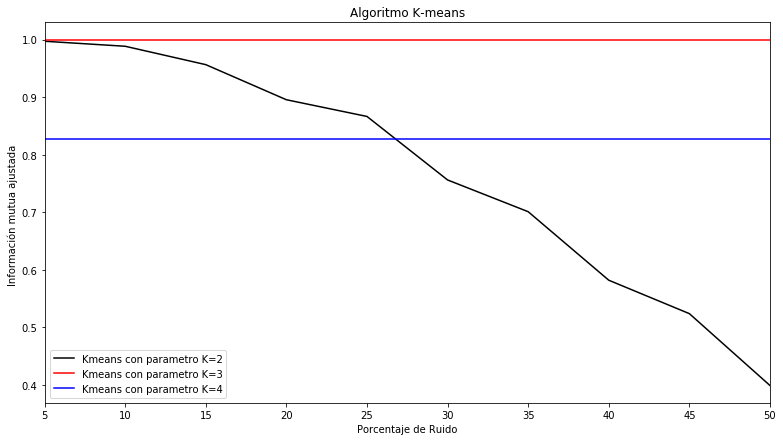

In [21]:
#K-means Informacion Mutua Ajustada
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(13, 7))
mediasIMkmeansK1.plot(color='black',label="Kmeans con parametro K=" + str(param_kmeans_nro1))
mediasIMkmeansK2.plot(color='red',label="Kmeans con parametro K=" + str(param_kmeans_nro2))
mediasIMkmeansK3.plot(color='blue',label="Kmeans con parametro K=" +  str(param_kmeans_nro3))
plt.xlabel('Porcentaje de Ruido')
plt.ylabel('Información mutua ajustada ')
plt.title('Algoritmo K-means')
plt.legend()
plt.show()

 Puntuaciones de Fowlkes-Mallows

In [22]:
mediasFMkmeansK1 = FMkmeansclusteringK1.groupby([FMkmeansclusteringK1['PorcRuido']
                              ])['Resultado'].mean()

mediasFMkmeansK1.index.names = ["PorcRuido"]
mediasFMkmeansK1

PorcRuido
5.0     0.998398
10.0    0.993590
15.0    0.975964
20.0    0.942314
25.0    0.926290
30.0    0.865398
35.0    0.834953
40.0    0.769254
45.0    0.737206
50.0    0.668303
Name: Resultado, dtype: float64

In [23]:
mediasFMkmeansK2 = FMkmeansclusteringK2.groupby([FMkmeansclusteringK2['PorcRuido']
                              ])['Resultado'].mean()

mediasFMkmeansK2.index.names = ["PorcRuido"]
mediasFMkmeansK2

PorcRuido
5.0     1.0
10.0    1.0
15.0    1.0
20.0    1.0
25.0    1.0
30.0    1.0
35.0    1.0
40.0    1.0
45.0    1.0
50.0    1.0
Name: Resultado, dtype: float64

In [24]:
mediasFMkmeansK3 = FMkmeansclusteringK3.groupby([FMkmeansclusteringK3['PorcRuido']
                              ])['Resultado'].mean()

mediasFMkmeansK3.index.names = ["PorcRuido"]
mediasFMkmeansK3

PorcRuido
5.0     0.913787
10.0    0.913787
15.0    0.913787
20.0    0.913787
25.0    0.913787
30.0    0.913787
35.0    0.913787
40.0    0.913787
45.0    0.913787
50.0    0.913787
Name: Resultado, dtype: float64

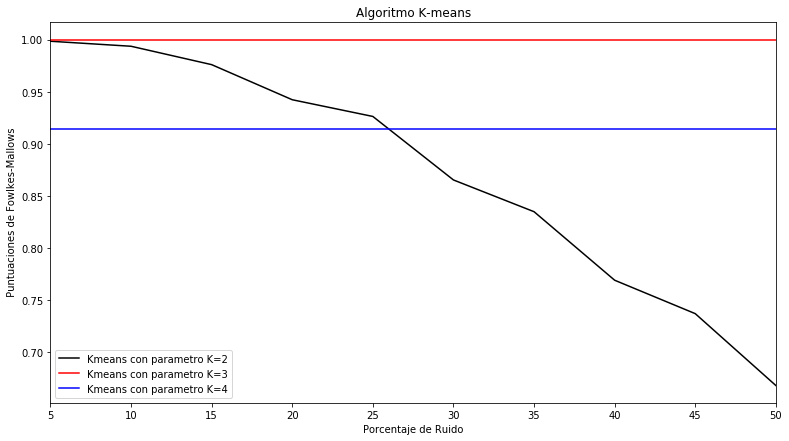

In [25]:
#K-means  Puntuaciones de Fowlkes-Mallows 
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(13, 7))
mediasFMkmeansK1.plot(color='black',label="Kmeans con parametro K=" + str(param_kmeans_nro1))
mediasFMkmeansK2.plot(color='red',label="Kmeans con parametro K=" + str(param_kmeans_nro2))
mediasFMkmeansK3.plot(color='blue',label="Kmeans con parametro K=" +  str(param_kmeans_nro3))
plt.xlabel('Porcentaje de Ruido')
plt.ylabel(' Puntuaciones de Fowlkes-Mallows')
plt.title('Algoritmo K-means')
plt.legend()
plt.show()

K-medoids

Índice de Rand ajustado

In [26]:
mediasRandkmedoidsK1 = RandkmedoidclusteringK1.groupby([RandkmedoidclusteringK1['PorcRuido']
                              ])['Resultado'].mean()

mediasRandkmedoidsK1.index.names = ["PorcRuido"]
mediasRandkmedoidsK1

PorcRuido
5.0     0.996401
10.0    0.985605
15.0    0.946020
20.0    0.870449
25.0    0.834462
30.0    0.697714
35.0    0.629339
40.0    0.481795
45.0    0.409822
50.0    0.255080
Name: Resultado, dtype: float64

In [27]:
mediasRandkmedoidsK2 = RandkmedoidclusteringK2.groupby([RandkmedoidclusteringK2['PorcRuido']
                              ])['Resultado'].mean()

mediasRandkmedoidsK2.index.names = ["PorcRuido"]
mediasRandkmedoidsK2

PorcRuido
5.0     1.0
10.0    1.0
15.0    1.0
20.0    1.0
25.0    1.0
30.0    1.0
35.0    1.0
40.0    1.0
45.0    1.0
50.0    1.0
Name: Resultado, dtype: float64

In [28]:
mediasRandkmedoidsK3 = RandkmedoidclusteringK3.groupby([RandkmedoidclusteringK3['PorcRuido']
                              ])['Resultado'].mean()

mediasRandkmedoidsK3.index.names = ["PorcRuido"]
mediasRandkmedoidsK3

PorcRuido
5.0     0.871071
10.0    0.871071
15.0    0.871071
20.0    0.871071
25.0    0.871071
30.0    0.871071
35.0    0.871071
40.0    0.871071
45.0    0.871071
50.0    0.871071
Name: Resultado, dtype: float64

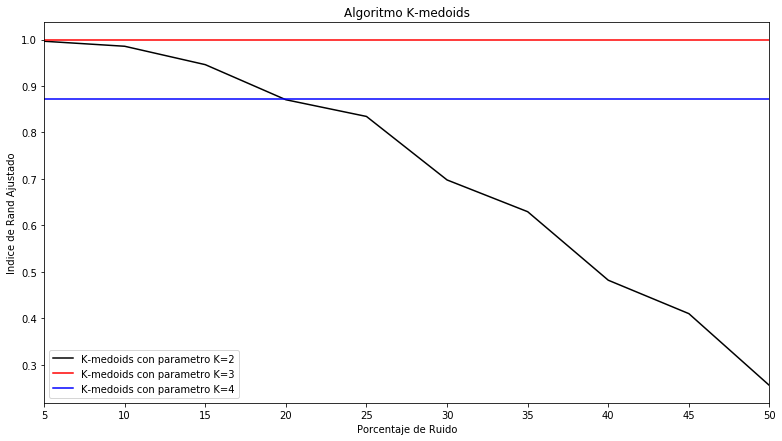

In [29]:
#K-means Indice de Rand Ajustado
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(13, 7))
mediasRandkmedoidsK1.plot(color='black',label="K-medoids con parametro K=" + str(param_kmeans_nro1))
mediasRandkmedoidsK2.plot(color='red',label="K-medoids con parametro K=" + str(param_kmeans_nro2))
mediasRandkmedoidsK3.plot(color='blue',label="K-medoids con parametro K=" +  str(param_kmeans_nro3))
plt.xlabel('Porcentaje de Ruido')
plt.ylabel('Indice de Rand Ajustado')
plt.title('Algoritmo K-medoids')
plt.legend()
plt.show()

Información mutua ajustada 

In [30]:
mediasIMkmedoidsK1 = IMkmedoidclusteringK1.groupby([IMkmedoidclusteringK1['PorcRuido']
                              ])['Resultado'].mean()

mediasIMkmedoidsK1.index.names = ["PorcRuido"]
mediasIMkmedoidsK1

PorcRuido
5.0     0.541792
10.0    0.275626
15.0    0.359197
20.0    0.559501
25.0    0.651017
30.0    0.715962
35.0    0.664773
40.0    0.621350
45.0    0.636872
50.0    0.671988
Name: Resultado, dtype: float64

In [31]:
mediasIMkmedoidsK2 = IMkmedoidclusteringK2.groupby([IMkmedoidclusteringK2['PorcRuido']
                              ])['Resultado'].mean()

mediasIMkmedoidsK2.index.names = ["PorcRuido"]
mediasIMkmedoidsK2

PorcRuido
5.0     1.000000
10.0    1.000000
15.0    0.996548
20.0    0.996589
25.0    0.987452
30.0    0.975703
35.0    0.937918
40.0    0.864578
45.0    0.823866
50.0    0.736690
Name: Resultado, dtype: float64

In [32]:
mediasIMkmedoidsK3 = IMkmedoidclusteringK3.groupby([IMkmedoidclusteringK3['PorcRuido']
                              ])['Resultado'].mean()

mediasIMkmedoidsK3.index.names = ["PorcRuido"]
mediasIMkmedoidsK3

PorcRuido
5.0     0.825809
10.0    0.841171
15.0    0.839905
20.0    0.828160
25.0    0.844471
30.0    0.844130
35.0    0.838645
40.0    0.843281
45.0    0.834607
50.0    0.821519
Name: Resultado, dtype: float64

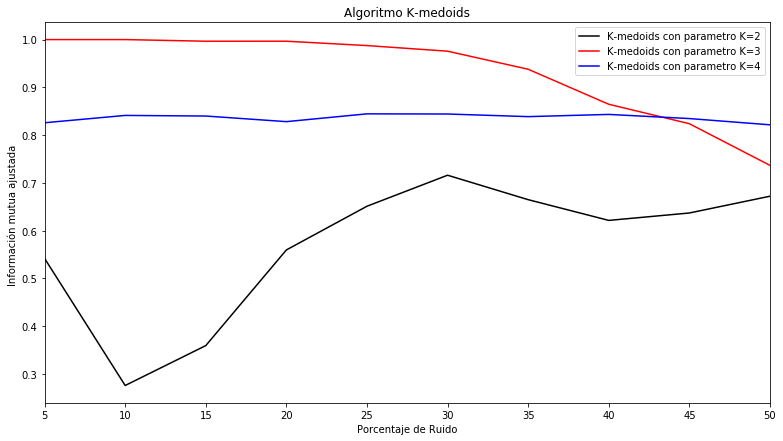

In [33]:
#K-means Coeficiente de Silueta
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(13, 7))
mediasIMkmedoidsK1.plot(color='black',label="K-medoids con parametro K=" + str(param_kmeans_nro1))
mediasIMkmedoidsK2.plot(color='red',label="K-medoids con parametro K=" + str(param_kmeans_nro2))
mediasIMkmedoidsK3.plot(color='blue',label="K-medoids con parametro K=" +  str(param_kmeans_nro3))
plt.xlabel('Porcentaje de Ruido')
plt.ylabel('Información mutua ajustada ')
plt.title('Algoritmo K-medoids')
plt.legend()
plt.show()

 Puntuaciones de Fowlkes-Mallows

In [34]:
mediasFMkmedoidsK1 = FMkmedoidclusteringK1.groupby([FMkmedoidclusteringK1['PorcRuido']
                              ])['Resultado'].mean()

mediasFMkmedoidsK1.index.names = ["PorcRuido"]
mediasFMkmedoidsK1

PorcRuido
5.0     0.753516
10.0    0.609398
15.0    0.654705
20.0    0.776240
25.0    0.837316
30.0    0.878062
35.0    0.861916
40.0    0.838024
45.0    0.850446
50.0    0.863726
Name: Resultado, dtype: float64

In [35]:
mediasFMkmedoidsK2 = FMkmedoidclusteringK2.groupby([FMkmedoidclusteringK2['PorcRuido']
                              ])['Resultado'].mean()

mediasFMkmedoidsK2.index.names = ["PorcRuido"]
mediasFMkmedoidsK2

PorcRuido
5.0     1.000000
10.0    1.000000
15.0    0.997418
20.0    0.997558
25.0    0.990721
30.0    0.982482
35.0    0.955133
40.0    0.904444
45.0    0.876458
50.0    0.815951
Name: Resultado, dtype: float64

In [36]:
mediasFMkmedoidsK3 = FMkmedoidclusteringK3.groupby([FMkmedoidclusteringK3['PorcRuido']
                              ])['Resultado'].mean()

mediasFMkmedoidsK3.index.names = ["PorcRuido"]
mediasFMkmedoidsK3

PorcRuido
5.0     0.839294
10.0    0.862968
15.0    0.863194
20.0    0.844070
25.0    0.865055
30.0    0.864699
35.0    0.863524
40.0    0.875791
45.0    0.872287
50.0    0.856234
Name: Resultado, dtype: float64

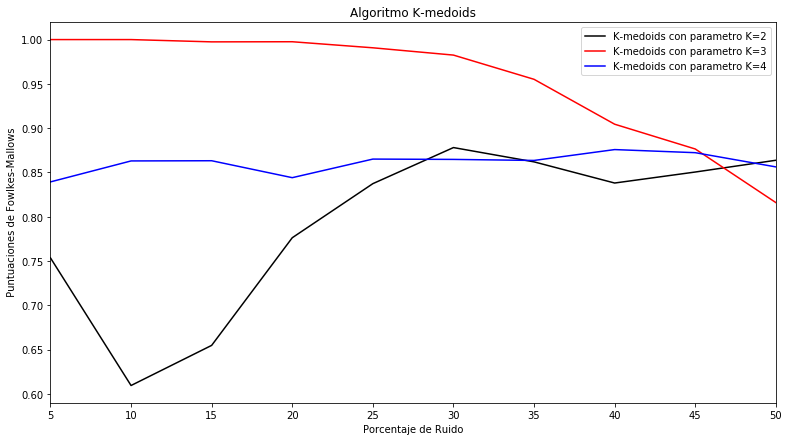

In [37]:
#K-medoids  Puntuaciones de Fowlkes-Mallows
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(13, 7))
mediasFMkmedoidsK1.plot(color='black',label="K-medoids con parametro K=" + str(param_kmeans_nro1))
mediasFMkmedoidsK2.plot(color='red',label="K-medoids con parametro K=" + str(param_kmeans_nro2))
mediasFMkmedoidsK3.plot(color='blue',label="K-medoids con parametro K=" +  str(param_kmeans_nro3))
plt.xlabel('Porcentaje de Ruido')
plt.ylabel(' Puntuaciones de Fowlkes-Mallows')
plt.title('Algoritmo K-medoids')
plt.legend()
plt.show()

DBSCAN

Índice de Rand ajustado

In [38]:
mediasRandDBSCAN1 = RandDbscanclustering1.groupby([RandDbscanclustering1['PorcRuido']
                              ])['Resultado'].mean()

mediasRandDBSCAN1.index.names = ["PorcRuido"]
mediasRandDBSCAN1

PorcRuido
5.0     1.0
10.0    1.0
15.0    1.0
20.0    1.0
25.0    1.0
30.0    1.0
35.0    1.0
40.0    1.0
45.0    1.0
50.0    1.0
Name: Resultado, dtype: float64

In [39]:
mediasRandDBSCAN2 = RandDbscanclustering2.groupby([RandDbscanclustering2['PorcRuido']
                              ])['Resultado'].mean()

mediasRandDBSCAN2.index.names = ["PorcRuido"]
mediasRandDBSCAN2

PorcRuido
5.0     1.0
10.0    1.0
15.0    1.0
20.0    1.0
25.0    1.0
30.0    1.0
35.0    1.0
40.0    1.0
45.0    1.0
50.0    1.0
Name: Resultado, dtype: float64

In [40]:
mediasRandDBSCAN3 = RandDbscanclustering3.groupby([RandDbscanclustering3['PorcRuido']
                              ])['Resultado'].mean()

mediasRandDBSCAN3.index.names = ["PorcRuido"]
mediasRandDBSCAN3

PorcRuido
5.0     1.0
10.0    1.0
15.0    1.0
20.0    1.0
25.0    1.0
30.0    1.0
35.0    1.0
40.0    1.0
45.0    1.0
50.0    1.0
Name: Resultado, dtype: float64

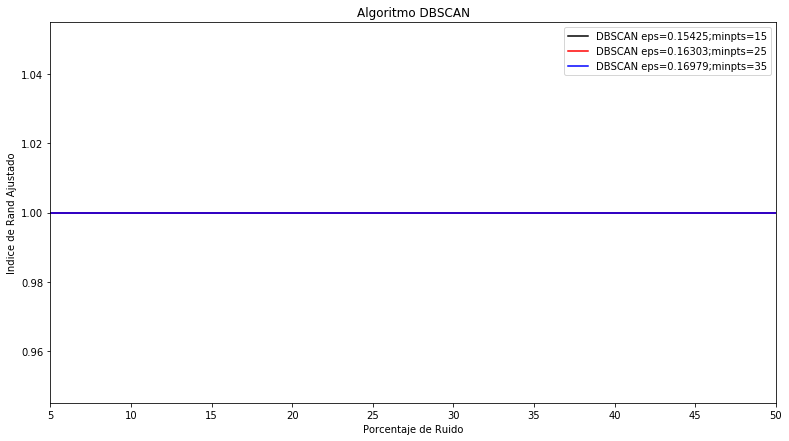

In [41]:
#K-means Indice de Rand Ajustado
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(13, 7))
mediasRandDBSCAN1.plot(color='black',label="DBSCAN eps=" + str(param_eps_nro1) + ";minpts=" + str(param_minpts_nro1))
mediasRandDBSCAN2.plot(color='red',label="DBSCAN eps=" + str(param_eps_nro2) + ";minpts=" + str(param_minpts_nro2))
mediasRandDBSCAN3.plot(color='blue',label="DBSCAN eps=" + str(param_eps_nro3) + ";minpts=" + str(param_minpts_nro3))
plt.xlabel('Porcentaje de Ruido')
plt.ylabel('Indice de Rand Ajustado')
plt.title('Algoritmo DBSCAN')
plt.legend()
plt.show()

Información mutua ajustada 

In [42]:
mediasIMDBSCAN1 = IMDbscanclustering1.groupby([IMDbscanclustering1['PorcRuido']
                              ])['Resultado'].mean()

mediasIMDBSCAN1.index.names = ["PorcRuido"]
mediasIMDBSCAN1

PorcRuido
5.0     1.0
10.0    1.0
15.0    1.0
20.0    1.0
25.0    1.0
30.0    1.0
35.0    1.0
40.0    1.0
45.0    1.0
50.0    1.0
Name: Resultado, dtype: float64

In [43]:
mediasIMDBSCAN2 = IMDbscanclustering2.groupby([IMDbscanclustering2['PorcRuido']
                              ])['Resultado'].mean()

mediasIMDBSCAN2.index.names = ["PorcRuido"]
mediasIMDBSCAN2

PorcRuido
5.0     1.0
10.0    1.0
15.0    1.0
20.0    1.0
25.0    1.0
30.0    1.0
35.0    1.0
40.0    1.0
45.0    1.0
50.0    1.0
Name: Resultado, dtype: float64

In [44]:
mediasIMDBSCAN3 = IMDbscanclustering3.groupby([IMDbscanclustering3['PorcRuido']
                              ])['Resultado'].mean()

mediasIMDBSCAN3.index.names = ["PorcRuido"]
mediasIMDBSCAN3

PorcRuido
5.0     1.0
10.0    1.0
15.0    1.0
20.0    1.0
25.0    1.0
30.0    1.0
35.0    1.0
40.0    1.0
45.0    1.0
50.0    1.0
Name: Resultado, dtype: float64

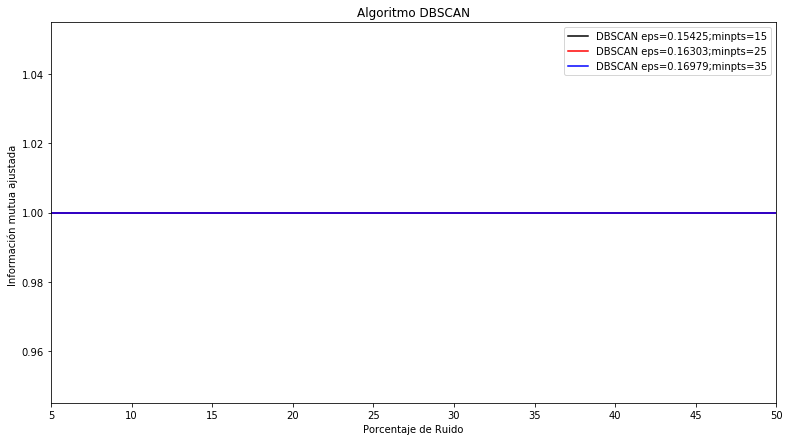

In [45]:
#DBSCAN Información mutua ajustada
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(13, 7))
mediasIMDBSCAN1.plot(color='black',label="DBSCAN eps=" + str(param_eps_nro1) + ";minpts=" + str(param_minpts_nro1))
mediasIMDBSCAN2.plot(color='red',label="DBSCAN eps=" + str(param_eps_nro2) + ";minpts=" + str(param_minpts_nro2))
mediasIMDBSCAN3.plot(color='blue',label="DBSCAN eps=" + str(param_eps_nro3) + ";minpts=" + str(param_minpts_nro3))
plt.xlabel('Porcentaje de Ruido')
plt.ylabel('Información mutua ajustada ')
plt.title('Algoritmo DBSCAN')
plt.legend()
plt.show()

 Puntuaciones de Fowlkes-Mallows

In [46]:
mediasFMDBSCAN1 = FMDbscanclustering1.groupby([FMDbscanclustering1['PorcRuido']
                              ])['Resultado'].mean()

mediasFMDBSCAN1.index.names = ["PorcRuido"]
mediasFMDBSCAN1

PorcRuido
5.0     1.0
10.0    1.0
15.0    1.0
20.0    1.0
25.0    1.0
30.0    1.0
35.0    1.0
40.0    1.0
45.0    1.0
50.0    1.0
Name: Resultado, dtype: float64

In [47]:
mediasFMDBSCAN2 = FMDbscanclustering2.groupby([FMDbscanclustering2['PorcRuido']
                              ])['Resultado'].mean()

mediasFMDBSCAN2.index.names = ["PorcRuido"]
mediasFMDBSCAN2

PorcRuido
5.0     1.0
10.0    1.0
15.0    1.0
20.0    1.0
25.0    1.0
30.0    1.0
35.0    1.0
40.0    1.0
45.0    1.0
50.0    1.0
Name: Resultado, dtype: float64

In [48]:
mediasFMDBSCAN3 = FMDbscanclustering3.groupby([FMDbscanclustering3['PorcRuido']
                              ])['Resultado'].mean()

mediasFMDBSCAN3.index.names = ["PorcRuido"]
mediasFMDBSCAN3

PorcRuido
5.0     1.0
10.0    1.0
15.0    1.0
20.0    1.0
25.0    1.0
30.0    1.0
35.0    1.0
40.0    1.0
45.0    1.0
50.0    1.0
Name: Resultado, dtype: float64

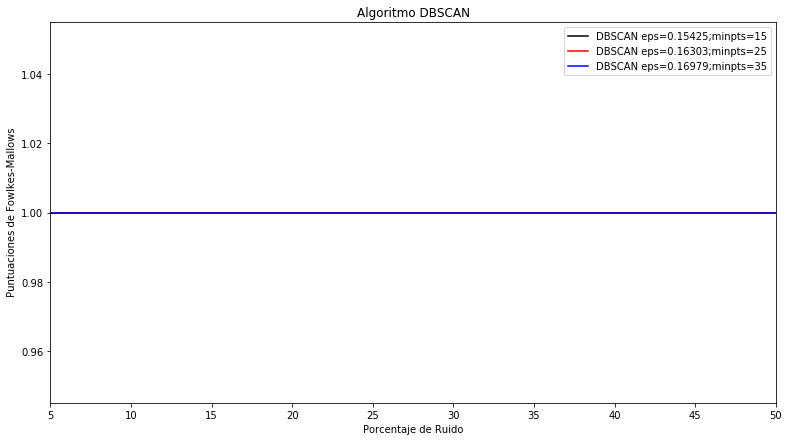

In [49]:
#BSCAN  Puntuaciones de Fowlkes-Mallows
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(13, 7))
mediasFMDBSCAN1.plot(color='black',label="DBSCAN eps=" + str(param_eps_nro1) + ";minpts=" + str(param_minpts_nro1))
mediasFMDBSCAN2.plot(color='red',label="DBSCAN eps=" + str(param_eps_nro2) + ";minpts=" + str(param_minpts_nro2))
mediasFMDBSCAN3.plot(color='blue',label="DBSCAN eps=" + str(param_eps_nro3) + ";minpts=" + str(param_minpts_nro3))
plt.xlabel('Porcentaje de Ruido')
plt.ylabel(' Puntuaciones de Fowlkes-Mallows')
plt.title('Algoritmo DBSCAN')
plt.legend()
plt.show()

# Resultados Agrupados por Métricas

Se tiene en cuenta los mejores resultados de cada algoritmo evaluado 

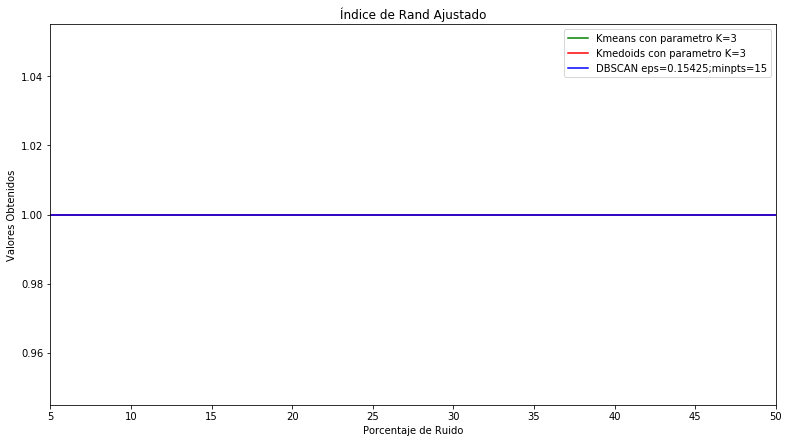

In [50]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(13, 7))
mediasRandkmeansK2.plot(color='green',label="Kmeans con parametro K=" + str(param_kmeans_nro2))
mediasRandkmedoidsK2.plot(color='red',label="Kmedoids con parametro K=" + str(param_kmedoids_nro2))
mediasRandDBSCAN1.plot(color='blue',label="DBSCAN eps=" + str(param_eps_nro1) + ";minpts=" + str(param_minpts_nro1))
plt.xlabel('Porcentaje de Ruido')
plt.ylabel('Valores Obtenidos')
plt.title('Índice de Rand Ajustado')
plt.legend()
plt.show() 

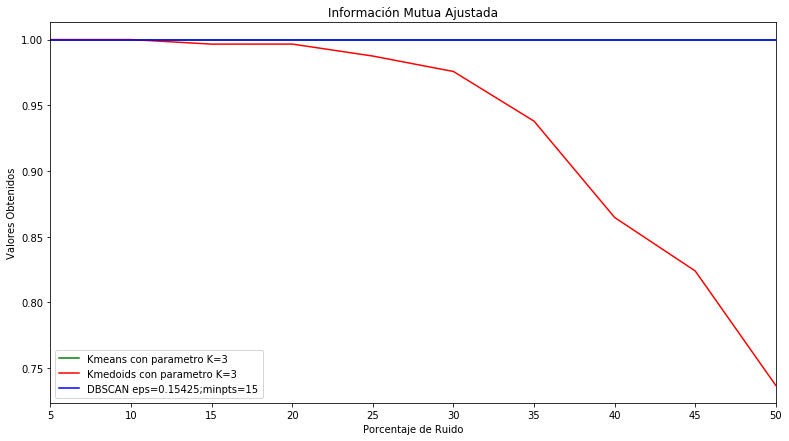

In [51]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(13, 7))
mediasIMkmeansK2.plot(color='green',label="Kmeans con parametro K=" + str(param_kmeans_nro2))
mediasIMkmedoidsK2.plot(color='red',label="Kmedoids con parametro K=" + str(param_kmedoids_nro2))
mediasIMDBSCAN1.plot(color='blue',label="DBSCAN eps=" + str(param_eps_nro1) + ";minpts=" + str(param_minpts_nro1))
plt.xlabel('Porcentaje de Ruido')
plt.ylabel('Valores Obtenidos')
plt.title('Información Mutua Ajustada')
plt.legend()
plt.show() 

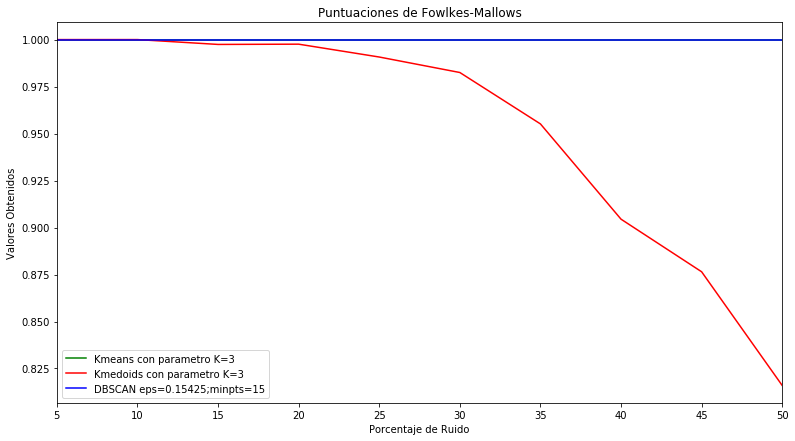

In [52]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(13, 7))
mediasFMkmeansK2.plot(color='green',label="Kmeans con parametro K=" + str(param_kmeans_nro2))
mediasFMkmedoidsK2.plot(color='red',label="Kmedoids con parametro K=" + str(param_kmedoids_nro2))
mediasFMDBSCAN1.plot(color='blue',label="DBSCAN eps=" + str(param_eps_nro1) + ";minpts=" + str(param_minpts_nro1))
plt.xlabel('Porcentaje de Ruido')
plt.ylabel('Valores Obtenidos')
plt.title('Puntuaciones de Fowlkes-Mallows')
plt.legend()
plt.show() 